# Introduction to Python and Numerical Methods (Part 2)
## Solving Tolman-Oppenheimer-Volkoff equations

Written by Andreu Masó. University of Valencia. May 6th, 2021. 1st i-School and Conference on Metric-Affine Gravity

# Euler method for differential equations

In [2]:
#Import modules

from matplotlib import pyplot as plt
import numpy as np
from scipy import constants


In [26]:
#Euler method differential equation solver


def EulerStep(x, y, h, dydx):
    next_x= x + h
    next_y= y + h * dydx(x,y)

    return next_x,next_y

def Euler(x0, xf, y0, h, dydx ):
    
    n= int( (xf-x0)/h ) #number of steps
    
    x = np.zeros(n)   #arrays of length n filled with zeros
    y = np.zeros(n)
    
    x[0] = x0
    y[0] = y0
    
    for i in range(0,n-1):
        
        x[i+1],y[i+1] = EulerStep(x[i], y[i], h, dydx)
        #Last element in the for loop is n-1 because the assignation
        #of values goes to i+1=n which is the last index of the array

    return x,y

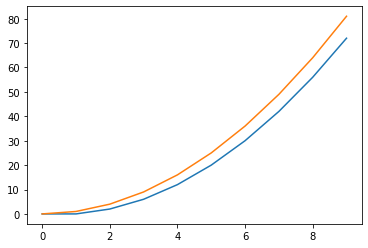

In [27]:
#Differential equation

def derivs(x,y): 
    f= 2*x
    return f

initial_x = 0
final_x = 10
initial_y = 0
step = 1

x, y = Euler(initial_x, final_x, initial_y, step, derivs)

plt.plot(x,y)
plt.plot(x,x**2)
plt.show()

# General differential equation solver

In [36]:
#General differential equation solver. Specify method with:
#'Euler' for Euler method
#'RK2E' for modified Euler method
#'RK2H' for Heun method
#'RK4' for 4th order Runge-Kutta method

def EulerStep(x, y, h, dydx):
    next_x= x + h
    next_y= y + h * dydx(x,y)

    return next_x,next_y



def RK2Estep(x ,y, h, dydx):
    next_x = x + h
    
    k1 = dydx(x, y)
    k2 = dydx(x + 0.5 * h, y + 0.5* h * k1)
    
    next_y = y + h * k2
    
    return next_x, next_y



def RK2Hstep(x ,y, h, dydx):
    next_x = x + h
    
    k1 = dydx(x, y)
    k2 = dydx(x + h, y + h * k1)
    
    next_y = y + 0.5 * h * (k2 + k1)
    
    return next_x, next_y




def RK4Step(x ,y, h, dydx):
    next_x = x + h
    
    k1 = dydx(x, y)
    k2 = dydx(x + 0.5 * h, y + 0.5 * h * k1)
    k3 = dydx(x + 0.5 * h, y + 0.5 * h * k2)
    k4 = dydx(x +  h, y +  h * k3)
    
    next_y = y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    return next_x, next_y





def Solver(x0, xf, y0, h, dydx, method):
    
    n= int( (xf-x0)/h ) #number of steps
    
    x = np.zeros(n)   #arrays of length n filled with zeros
    y = np.zeros(n)
    
    x[0] = x0
    y[0] = y0
    
    for i in range(0,n-1):
        
        if method == 'Euler':
            x[i+1],y[i+1] = EulerStep(x[i], y[i], h, dydx)
            
        elif method == 'RK2E':
            x[i+1],y[i+1] = RK2EStep(x[i], y[i], h, dydx)
            
        elif method == 'RK2H':
            x[i+1],y[i+1] = RK2HStep(x[i], y[i], h, dydx)
            
        elif method == 'RK4':
            x[i+1],y[i+1] = RK4Step(x[i], y[i], h, dydx)
        
    return x,y

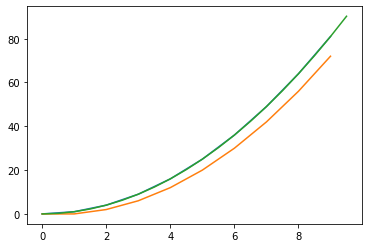

In [85]:
#Differential equation solution

def diff(x,y): 
    f= 2*x
    return f

initial_x = 0
final_x = 10
initial_y = 0
step = 1

x1, y1 = Solver(initial_x, final_x, initial_y, step, diff, 'RK4')
x2, y2 = Solver(initial_x, final_x, initial_y, step, diff, 'Euler')

x=np.arange(0, 10,0.5)

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x,x**2)
plt.show()


# General system of  differential equations solver

In [56]:
#General system of  differential equations solver. Specify method with:
#'Euler' for Euler method
#'RK2E' for modified Euler method
#'RK2H' for Heun method
#'RK4' for 4th order Runge-Kutta method

#x0-> initial x
#xf-> final x
#y0-> initial y
#h-> step
#dydx-> derivative functions
#method-> integration method
#N number of equations

def SystemSolver(x0, xf, y0, h, dydx, method, N):  #x0,xf,h,N ->float ; y0, dydx-> array; metod -> string
    
    n= int( (xf-x0)/h ) #number of steps
    
    x = np.zeros(n)   #arrays of length n filled with zeros
    y = np.zeros((N,n))
    
    x[0] = x0
    y[:,0] = y0
    
    for i in range(0,n-1):
        
        if method == 'Euler':
            x[i+1],y[:,i+1] = EulerStep(x[i], y[:,i], h, dydx)
            
        elif method == 'RK2E':
            x[i+1],y[:,i+1] = RK2EStep(x[i], y[:,i], h, dydx)
            
        elif method == 'RK2H':
            x[i+1],y[:,i+1] = RK2HStep(x[i], y[:,i], h, dydx)
            
        elif method == 'RK4':
            x[i+1],y[:,i+1] = RK4Step(x[i], y[:,i], h, dydx)
        
    return x,y



<ipython-input-79-1e889027e35e>:8: RuntimeWarning: invalid value encountered in double_scalars
  rho = (y[0]/K)**(1/Gamma)


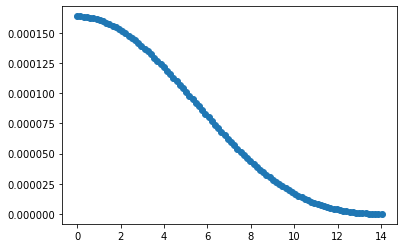

In [79]:
#Solving TOV equations

#y[0]-> pressure
#y[1]-> mass
#y[2]-> phi factor

def derivs(x,y): 
    rho = (y[0]/K)**(1/Gamma)
    eps = y[0]/((Gamma - 1)*rho)
    mu = rho * (1+eps)

    
 
    P_prime  = - G*(mu + y[0]/c**2)* (y[1]+4 * np.pi * x**3 * y[0]/c**2) / (x*(x-2*G*y[1]/c**2))
    m_prime  = 4*np.pi* x**2 * mu
    phi_prime= (y[1]+4 * np.pi * x**3 * y[0]/c**2) / (x*(x-2*G*y[1]/c**2))
    
    dydx = np.array((P_prime,m_prime, phi_prime))
    
    return dydx



#NS Parameters
K=100
Gamma=2
rho_c=1.28*10**(-3)
P_c= K* rho_c**Gamma

#Integration parameters
initial_x = 0.0001    #TOV equations are singular at x=0
final_x = 20.0001
initial_y = np.array((P_c, 0, 0))
step = 0.1
N=3    #number of equations
G=1    #Newton's constant
c=1    #speed of light


#Solution
x, y = SystemSolver(initial_x, final_x, initial_y, step, derivs, 'RK4',N)


#Plot
plt.scatter(x*1.477,y[0,:])  #multiplied by 1.477 to have the radial coordinate in km
plt.show()

# Convergence Test

<ipython-input-79-1e889027e35e>:8: RuntimeWarning: invalid value encountered in double_scalars
  rho = (y[0]/K)**(1/Gamma)
<ipython-input-83-dbbb3d2fd036>:32: RuntimeWarning: invalid value encountered in true_divide
  conv[:,i]=(y_long[:,i]-y_half[:,i*2])/(y_half[:,i*2]-y_fourth[:,i*4])


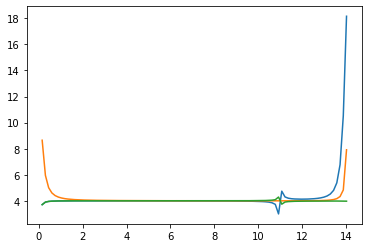

In [83]:
#Convergence test

#NS Parameters
K=100
Gamma=2
rho_c=1.28*10**(-3)
P_c= K* rho_c**Gamma

#Integration parameters
initial_x = 0.0001    #TOV equations are singular at x=0
final_x = 20.0001
initial_y = np.array((P_c, 0, 0))
step = 0.1
N=3    #number of equations
G=1    #Newton's constant
c=1    #speed of light
method = 'RK4'


x_long,y_long = SystemSolver(initial_x, final_x, initial_y, step, derivs, method,N)

step = step/2    #Can be written as: step /= 2
x_half,y_half = SystemSolver(initial_x, final_x, initial_y, step, derivs, method,N)

step = step/2    #Can be written as: step /= 2
x_fourth,y_fourth = SystemSolver(initial_x, final_x, initial_y, step, derivs, method,N)


conv=np.zeros((3, len(y_long[0,:]) ))

for i in range(0,len(y_long[0,:])):
    conv[:,i]=(y_long[:,i]-y_half[:,i*2])/(y_half[:,i*2]-y_fourth[:,i*4])


plt.plot(x_long*1.477,conv[0,:])
plt.plot(x_long*1.477,conv[1,:])
plt.plot(x_long*1.477,conv[2,:])
plt.show()

# Solving Differential Equations with SciPy

<ipython-input-79-1e889027e35e>:8: RuntimeWarning: invalid value encountered in double_scalars
  rho = (y[0]/K)**(1/Gamma)


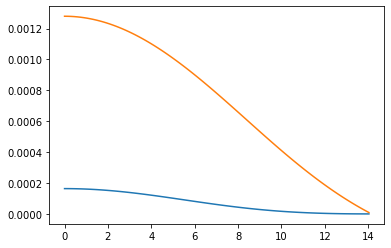

In [89]:
from scipy.integrate import solve_ivp

#NS Parameters
K=100
Gamma=2
rho_c=1.28*10**(-3)
P_c= K* rho_c**Gamma

#Integration parameters
initial_x = 0.0001    #TOV equations are singular at x=0
final_x = 20.0001
output_x = np.arange(initial_x, final_x, 0.1)
initial_y = np.array((P_c, 0, 0))
step = 0.1
N=3    #number of equations
G=1    #Newton's constant
c=1    #speed of light
method = 'RK45'


sol = solve_ivp(derivs, [initial_x, final_x], initial_y, t_eval=output_x, method=method)


plt.plot(sol.t*1.477, sol.y[0])
plt.plot(sol.t*1.477, (sol.y[0]/K)**(1/Gamma))

# Adaptative stepsize 4th order Runga-Kutta solver

In [109]:
#Adaptive stepsize Runge-Kutta

def adRK(x0, xf, y0, h,derivs,N):
    
    eps=0.0001
    safe=0.9
    errcon=0.0006
    
    n=int((xf-x0)/h)
    x=np.zeros(1)
    y=np.zeros((N,1))
    x[0]=x0
    y[:,0]=y0
    
    i=0
    while x[i]<xf:    

        x1,y1=RK4step(x[i],y[:,i],h,derivs)
        
        x2,y2=RK4step(x[i],y[:,i],0.5*h,derivs)
        x2,y2=RK4step(x[i]+0.5*h,y2,0.5*h,derivs)
        
        x1=np.array([x1])
        x=np.concatenate((x,x1), axis=0)


        ycal=y[:,i]+h*derivs(x[i],y[:,i])
        err=(y2-y1)/(ycal*eps)
        err=max(err[0],err[1],err[2])
        
        if err>1:
            h=safe*h*err**-0.25
        else:
            if err>errcon:
                h=safe*h*err**-0.2
            else:
                h=4*h
        
        y_aux=np.array([[y1[0]],[y1[1]],[y1[2]]])
        y=np.concatenate((y,y_aux),axis=1)
        
        i+=1
        
        
    return x,y

<ipython-input-79-1e889027e35e>:8: RuntimeWarning: invalid value encountered in double_scalars
  rho = (y[0]/K)**(1/Gamma)


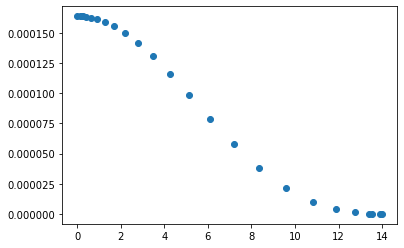

In [110]:
#NS Parameters
K=100
Gamma=2
rho_c=1.28*10**(-3)
P_c= K* rho_c**Gamma

#Integration parameters
initial_x = 0.0001    #TOV equations are singular at x=0
final_x = 20.0001
initial_y = np.array((P_c, 0, 0))
step = 0.1
N=3    #number of equations
G=1    #Newton's constant
c=1    #speed of light


x,y=adRK(initial_x, final_x , initial_y , step ,derivs, N)

plt.scatter(x*1.477,y[0,:]) 
plt.show()